In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
phys_supp = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2017.txt", sep='\t', usecols=['npi', 'nppes_provider_last_org_name', 'nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'place_of_service', 'hcpcs_code', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt'], dtype={'npi': str, 'nppes_provider_last_org_name' : str, 'nppes_entity_code' : str, 'nppes_provider_zip' : str, 'nppes_provider_state' : str, 'provider_type' : str, 'place_of_service' : str, 'hcpcs_code' : str, 'bene_day_srvc_cnt' : float, 'average_Medicare_allowed_amt' : float})



In [6]:
phys_supp['zip_5digits'] = phys_supp['nppes_provider_zip'].str[:5]

In [7]:
print(phys_supp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9847444 entries, 0 to 9847443
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   npi                           object 
 1   nppes_provider_last_org_name  object 
 2   nppes_entity_code             object 
 3   nppes_provider_zip            object 
 4   nppes_provider_state          object 
 5   provider_type                 object 
 6   place_of_service              object 
 7   hcpcs_code                    object 
 8   bene_day_srvc_cnt             float64
 9   average_Medicare_allowed_amt  float64
 10  zip_5digits                   object 
dtypes: float64(2), object(9)
memory usage: 826.4+ MB
None


In [8]:
hosp_op = pd.read_excel("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/MUP_OHP_R19_P04_V10_D17_APC_Provider.xlsx", header=5, usecols=['Provider ID', 'Provider Name', 'Provider\nState', 'Provider\nZip Code', 'APC', 'Comprehensive APC\nServices', 'Average\nMedicare\nAllowed\nAmount'], dtype={'Provider ID' : str, 'Provider Name' : str, 'Provider\nState' : str, 'Provider\nZip Code' : str,  'APC' : str, 'Comprehensive APC\nServices' : int, 'Average\nMedicare\nAllowed\nAmount' : float})



In [9]:
print(hosp_op.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61779 entries, 0 to 61778
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      61779 non-null  object 
 1   Provider Name                    61779 non-null  object 
 2   Provider
State                   61779 non-null  object 
 3   Provider
Zip Code                61779 non-null  object 
 4   APC                              61779 non-null  object 
 5   Comprehensive APC
Services       61779 non-null  int64  
 6   Average
Medicare
Allowed
Amount  61779 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.3+ MB
None


In [10]:
hosp_op = hosp_op.rename(columns={'Provider\nState' : 'Provider State', 'Provider\nZip Code' : 'Provider Zip Code', 'Comprehensive APC\nServices' : 'Comprehensive APC Services', 'Average\nMedicare\nAllowed\nAmount' : 'Average Medicare Allowed Amount'})



In [11]:
print(hosp_op.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61779 entries, 0 to 61778
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      61779 non-null  object 
 1   Provider Name                    61779 non-null  object 
 2   Provider State                   61779 non-null  object 
 3   Provider Zip Code                61779 non-null  object 
 4   APC                              61779 non-null  object 
 5   Comprehensive APC Services       61779 non-null  int64  
 6   Average Medicare Allowed Amount  61779 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.3+ MB
None


In [12]:
apc_cw = pd.read_excel("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/2020_january_web_addendum_b.12312019.xlsx", header=2, usecols=['HCPCS Code', 'APC ', 'Relative Weight', 'Payment Rate ', 'Minimum Unadjusted Copayment '], dtype={'HCPS Code' : str, 'APC ' : str, 'Relative Weight' : float, 'Payment Rate ' : float, 'Minimum Unadjusted Copayment ' : float})



In [13]:
print(apc_cw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16628 entries, 0 to 16627
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HCPCS Code                     16628 non-null  object 
 1   APC                            5942 non-null   object 
 2   Relative Weight                5516 non-null   float64
 3   Payment Rate                   5936 non-null   float64
 4   Minimum Unadjusted Copayment   5936 non-null   float64
dtypes: float64(3), object(2)
memory usage: 649.7+ KB
None


In [14]:
apc_cw = apc_cw.rename(columns={'APC ' : 'APC', 'Payment Rate ' : 'Payment Rate', 'Minimum Unadjusted Copayment ' : 'Minimum Unadjusted Copayment'})

In [15]:
zip_cbsa = pd.read_excel("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/ZIP_CBSA_032020.xlsx", usecols=['ZIP', 'CBSA'], dtype={'ZIP' : str, 'CBSA' : str})



In [16]:
zip_cbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ZIP     47415 non-null  object
 1   CBSA    47415 non-null  object
dtypes: object(2)
memory usage: 741.0+ KB


In [17]:
phys_nash = pd.merge(phys_supp, zip_cbsa, how='left', left_on='zip_5digits', right_on='ZIP')
phys_nash = pd.merge(phys_nash, apc_cw, how='left', left_on='hcpcs_code', right_on='HCPCS Code')

In [18]:
phys_nash = phys_nash[phys_nash['APC'] == '5302']

In [19]:
phys_nash = phys_nash[phys_nash['provider_type'] == 'Ambulatory Surgical Center']

In [20]:
phys_nash = phys_nash[phys_nash['CBSA'] == '34980']

In [21]:
phys_nash = phys_nash.drop(['zip_5digits', 'HCPCS Code', 'nppes_provider_last_org_name', 'nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'hcpcs_code', 'ZIP', 'CBSA', 'APC', 'Relative Weight', 'Payment Rate', 'Minimum Unadjusted Copayment'], axis=1)
print(phys_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1419490 to 6997002
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   npi                           8 non-null      object 
 1   place_of_service              8 non-null      object 
 2   bene_day_srvc_cnt             8 non-null      float64
 3   average_Medicare_allowed_amt  8 non-null      float64
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes
None


In [22]:
phys_nash = phys_nash.drop('place_of_service', axis=1)
print(phys_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1419490 to 6997002
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   npi                           8 non-null      object 
 1   bene_day_srvc_cnt             8 non-null      float64
 2   average_Medicare_allowed_amt  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 256.0+ bytes
None


In [23]:
phys_nash = phys_nash.rename(columns={'npi' : 'npi/provider_id', 'bene_day_srvc_cnt' : 'service_cnt', 'average_Medicare_allowed_amt' : 'med_allwd_amt'})

In [24]:
print(phys_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1419490 to 6997002
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   npi/provider_id  8 non-null      object 
 1   service_cnt      8 non-null      float64
 2   med_allwd_amt    8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 256.0+ bytes
None


In [25]:
print(np.shape(phys_nash))

(8, 3)


In [26]:
hosp_nash = pd.merge(hosp_op, zip_cbsa, how='left', left_on='Provider Zip Code', right_on='ZIP')

In [27]:
hosp_nash = hosp_nash[hosp_nash['APC'] == '5302']

In [28]:
hosp_nash = hosp_nash[hosp_nash['CBSA'] == '34980']

In [29]:
hosp_nash = hosp_nash.drop(['Provider Zip Code','Provider Name', 'Provider State', 'APC', 'ZIP', 'CBSA'], axis=1)
print(hosp_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 57329 to 59055
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      17 non-null     object 
 1   Comprehensive APC Services       17 non-null     int64  
 2   Average Medicare Allowed Amount  17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 544.0+ bytes
None


In [30]:
hosp_nash = hosp_nash.rename(columns={'Provider ID' : 'npi/provider_id', 'Comprehensive APC Services' : 'service_cnt', 'Average Medicare Allowed Amount' : 'med_allwd_amt'})

In [31]:
print(hosp_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 57329 to 59055
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   npi/provider_id  17 non-null     object 
 1   service_cnt      17 non-null     int64  
 2   med_allwd_amt    17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 544.0+ bytes
None


In [32]:
print(np.shape(hosp_nash))

(17, 3)


In [33]:
phys_hosp_union = pd.concat([phys_nash, hosp_nash], ignore_index=True)
print(phys_hosp_union)

   npi/provider_id  service_cnt  med_allwd_amt
0       1124498357         16.0     660.990000
1       1225039761         17.0     565.636471
2       1225039761         14.0     587.110000
3       1235376104         17.0     550.540000
4       1235376104         21.0     537.431905
5       1295708964         34.0     587.110000
6       1427152073         23.0     587.110000
7       1639299803         33.0     587.110000
8           440003        114.0    1223.454825
9           440006         15.0    1248.620000
10          440029         18.0    1248.620000
11          440039        623.0    1205.620546
12          440046         13.0    1095.567692
13          440053         55.0    1248.620000
14          440065         29.0    1248.620000
15          440073        254.0    1229.639134
16          440082        207.0    1224.590048
17          440111         12.0    1248.620000
18          440133         98.0    1238.468571
19          440150         21.0    1159.030952
20          4

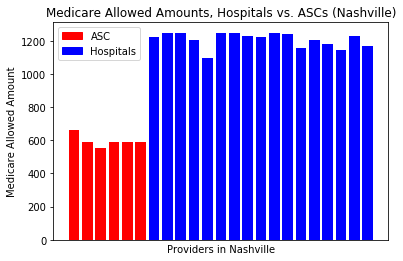

In [34]:
colors = []
for amt in phys_hosp_union['med_allwd_amt']:
    if amt < 700:
        colors.append('red')
    else:
        colors.append('blue')
labels = {'ASC' : 'red', 'Hospitals' : 'blue'}
labels2 = list(labels.keys())
plt.bar(phys_hosp_union['npi/provider_id'], phys_hosp_union['med_allwd_amt'], color=colors, label=labels)
handles = [plt.Rectangle((0,0),1,1, color=labels[label]) for label in labels2]
plt.xticks([])
plt.xlabel('Providers in Nashville')
plt.ylabel('Medicare Allowed Amount')
plt.title('Medicare Allowed Amounts, Hospitals vs. ASCs (Nashville)')
plt.legend(handles, labels2)
plt.show()

ASC's costs are significantly lower than hospitals. This is most likely due to ASCs being a facility place of service, meaning the bill has likely been split between multiple providers.

In [35]:
phys_mean = np.mean(phys_nash['med_allwd_amt'])
print(phys_mean)

582.87979691875


In [36]:
hosp_mean = np.mean(hosp_nash['med_allwd_amt'])
print(hosp_mean)

1208.848899031107


In [37]:
hosp_zip = pd.merge(hosp_op, zip_cbsa, how='left', left_on='Provider Zip Code', right_on='ZIP')
print(hosp_zip.head())

  Provider ID                     Provider Name Provider State  \
0       10001  Southeast Alabama Medical Center             AL   
1       10001  Southeast Alabama Medical Center             AL   
2       10001  Southeast Alabama Medical Center             AL   
3       10001  Southeast Alabama Medical Center             AL   
4       10001  Southeast Alabama Medical Center             AL   

  Provider Zip Code   APC  Comprehensive APC Services  \
0             36301  5072                         259   
1             36301  5073                          53   
2             36301  5091                          27   
3             36301  5092                          23   
4             36301  5112                          17   

   Average Medicare Allowed Amount    ZIP   CBSA  
0                      1038.454672  36301  20020  
1                      1792.596792  36301  20020  
2                      2113.580000  36301  20020  
3                      3737.140000  36301  20020  
4    

In [38]:
print(hosp_zip.groupby('APC').count().sort_values(by=['Provider ID'], ascending=False))

      Provider ID  Provider Name  Provider State  Provider Zip Code  \
APC                                                                   
8011         3554           3554            3554               3554   
5072         3142           3142            3142               3142   
5113         3062           3062            3062               3062   
5361         2992           2992            2992               2992   
5114         2945           2945            2945               2945   
5341         2691           2691            2691               2691   
5302         2660           2660            2660               2660   
5375         2565           2565            2565               2565   
5112         2511           2511            2511               2511   
5373         2409           2409            2409               2409   
5374         2324           2324            2324               2324   
5431         2276           2276            2276               2276   
5191  

In [39]:
print(hosp_zip.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70784 entries, 0 to 70783
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      70784 non-null  object 
 1   Provider Name                    70784 non-null  object 
 2   Provider State                   70784 non-null  object 
 3   Provider Zip Code                70784 non-null  object 
 4   APC                              70784 non-null  object 
 5   Comprehensive APC Services       70784 non-null  int64  
 6   Average Medicare Allowed Amount  70784 non-null  float64
 7   ZIP                              65841 non-null  object 
 8   CBSA                             65841 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 5.4+ MB
None


In [40]:
hosp_nyc = hosp_zip[hosp_zip['APC'] == '5072']

In [41]:
hosp_nyc = hosp_nyc[hosp_nyc['CBSA'] == '35620']

In [42]:
print(hosp_nyc)

      Provider ID                                  Provider Name  \
40334      330006                     St Joseph's Medical Center   
40346      330009                  Bronx-Lebanon Hospital Center   
40422      330014                Jamaica Hospital Medical Center   
40428      330019  New York Community Hospital Of Brooklyn, Inc.   
40479      330024                           Mount Sinai Hospital   
...           ...                                            ...   
43261      330393                            University Hospital   
43343      330395    St John's Episcopal Hospital At South Shore   
43349      330396      Woodhull Medical And Mental Health Center   
43356      330399                           St Barnabas Hospital   
43361      330401                 St Catherine Of Siena Hospital   

      Provider State Provider Zip Code   APC  Comprehensive APC Services  \
40334             NY             10701  5072                          19   
40346             NY           

In [43]:
phys_zip = pd.merge(phys_supp, zip_cbsa, how='left', left_on='zip_5digits', right_on='ZIP')
phys_zip = pd.merge(phys_zip, apc_cw, how='left', left_on='hcpcs_code', right_on='HCPCS Code')
print(phys_zip.head())

          npi                       nppes_provider_last_org_name  \
0  0000000001  CPT copyright 2016 American Medical Associatio...   
1  1003000126                                          ENKESHAFI   
2  1003000126                                          ENKESHAFI   
3  1003000126                                          ENKESHAFI   
4  1003000126                                          ENKESHAFI   

  nppes_entity_code nppes_provider_zip nppes_provider_state  \
0               NaN                NaN                  NaN   
1                 I          215021854                   MD   
2                 I          215021854                   MD   
3                 I          215021854                   MD   
4                 I          215021854                   MD   

       provider_type place_of_service hcpcs_code  bene_day_srvc_cnt  \
0                NaN              NaN        NaN                NaN   
1  Internal Medicine                F      99217              100.0   

In [44]:
print(phys_zip.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10983897 entries, 0 to 10983896
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   npi                           object 
 1   nppes_provider_last_org_name  object 
 2   nppes_entity_code             object 
 3   nppes_provider_zip            object 
 4   nppes_provider_state          object 
 5   provider_type                 object 
 6   place_of_service              object 
 7   hcpcs_code                    object 
 8   bene_day_srvc_cnt             float64
 9   average_Medicare_allowed_amt  float64
 10  zip_5digits                   object 
 11  ZIP                           object 
 12  CBSA                          object 
 13  HCPCS Code                    object 
 14  APC                           object 
 15  Relative Weight               float64
 16  Payment Rate                  float64
 17  Minimum Unadjusted Copayment  float64
dtypes: float64(5), objec

In [60]:
phys_zip2 = phys_zip[phys_zip['APC'] == '5072']
phys_zip2 = phys_zip2[phys_zip2['HCPCS Code'] == '19083']
phys_zip2 = phys_zip2[phys_zip2['nppes_entity_code'] == 'I']
phys_zip2 = phys_zip2[phys_zip2['place_of_service'] == 'O']
print(phys_zip2.head())

              npi nppes_provider_last_org_name nppes_entity_code  \
22317  1003131012                       SPRUNT                 I   
39359  1003805060                          MAY                 I   
51064  1003822123                     WILLIAMS                 I   
54146  1003831066                         CHEN                 I   
56100  1003836214                       KOOLPE                 I   

      nppes_provider_zip nppes_provider_state         provider_type  \
22317          787051166                   TX     Surgical Oncology   
39359          852515648                   AZ  Diagnostic Radiology   
51064          648043503                   MO  Diagnostic Radiology   
54146          220314400                   VA  Diagnostic Radiology   
56100          875054754                   NM  Diagnostic Radiology   

      place_of_service hcpcs_code  bene_day_srvc_cnt  \
22317                O      19083               11.0   
39359                O      19083               21.0

In [61]:
phys_zip_group = phys_zip2.groupby('provider_type').mean()
phys_zip_group = phys_zip_group.reset_index()
print(phys_zip_group)

               provider_type  bene_day_srvc_cnt  average_Medicare_allowed_amt  \
0             Anesthesiology          17.000000                    437.687667   
1       Diagnostic Radiology          22.886667                    573.654818   
2            Family Practice          12.000000                    601.038333   
3           General Practice          43.000000                    725.814393   
4            General Surgery          24.698675                    650.315488   
5     Gynecological Oncology          30.000000                    157.846250   
6   Interventional Radiology          26.800000                    653.008033   
7           Nuclear Medicine          22.000000                    662.090000   
8    Obstetrics & Gynecology          11.000000                    641.750000   
9                  Pathology          14.000000                    760.072857   
10        Radiation Oncology          12.000000                    686.558205   
11         Surgical Oncology

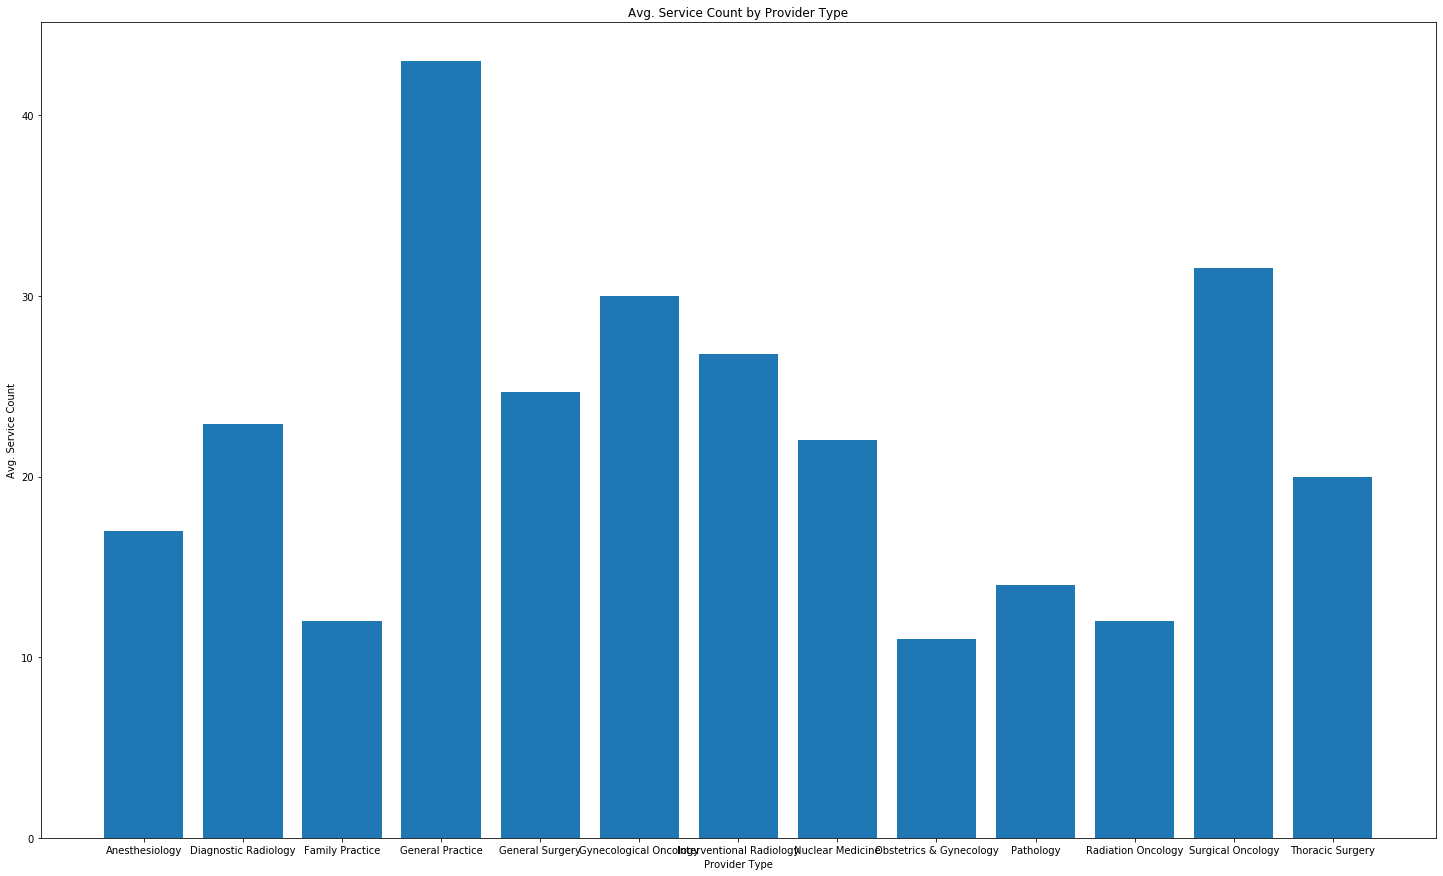

In [71]:
plt.figure(figsize=(25,15))
plt.bar(phys_zip_group['provider_type'], phys_zip_group['bene_day_srvc_cnt'])
plt.xlabel('Provider Type')
plt.ylabel('Avg. Service Count')
plt.title('Avg. Service Count by Provider Type')
plt.show()

In [45]:
phys_nyc = phys_zip[phys_zip['APC'] == '5072']
print(phys_nyc.groupby('HCPCS Code').count().sort_values(by=['npi'], ascending=False).head())

             npi  nppes_provider_last_org_name  nppes_entity_code  \
HCPCS Code                                                          
19083       3737                          3737               3737   
38221       3713                          3713               3713   
32405       2270                          2270               2270   
19081       1704                          1704               1704   
47000       1471                          1471               1471   

            nppes_provider_zip  nppes_provider_state  provider_type  \
HCPCS Code                                                            
19083                     3737                  3737           3737   
38221                     3713                  3713           3713   
32405                     2270                  2270           2270   
19081                     1704                  1704           1704   
47000                     1471                  1471           1471   

            place_

In [46]:
phys_nyc = phys_nyc[phys_nyc['HCPCS Code'] == '19083']
phys_nyc = phys_nyc[phys_nyc['nppes_entity_code'] == 'I']
phys_nyc = phys_nyc[phys_nyc['place_of_service'] == 'O']
phys_nyc = phys_nyc[phys_nyc['CBSA'] == '35620']
print(phys_nyc.head())

               npi nppes_provider_last_org_name nppes_entity_code  \
82733   1003887613                     SALDANHA                 I   
142810  1013179894                         SHAH                 I   
240913  1023040771                       O'SHEA                 I   
314456  1023329299                     KAMENETZ                 I   
360543  1033166582                          LEE                 I   

       nppes_provider_zip nppes_provider_state         provider_type  \
82733           115304822                   NY  Diagnostic Radiology   
142810          100282140                   NY  Diagnostic Radiology   
240913          070424837                   NJ     Surgical Oncology   
314456          104612728                   NY  Diagnostic Radiology   
360543          070423426                   NJ  Diagnostic Radiology   

       place_of_service hcpcs_code  bene_day_srvc_cnt  \
82733                 O      19083               13.0   
142810                O      19083    

In [56]:
phys_nyc_group = phys_nyc.groupby('provider_type').mean()
phys_nyc_group = phys_nyc_group.reset_index()
print(phys_nyc_group)

          provider_type  bene_day_srvc_cnt  average_Medicare_allowed_amt  \
0  Diagnostic Radiology          21.855072                    628.093283   
1      General Practice          32.500000                    779.752391   
2       General Surgery          29.176471                    797.766217   
3     Surgical Oncology          78.800000                    764.560000   

   Relative Weight  Payment Rate  Minimum Unadjusted Copayment  
0          16.9891        1372.6                        274.52  
1          16.9891        1372.6                        274.52  
2          16.9891        1372.6                        274.52  
3          16.9891        1372.6                        274.52  


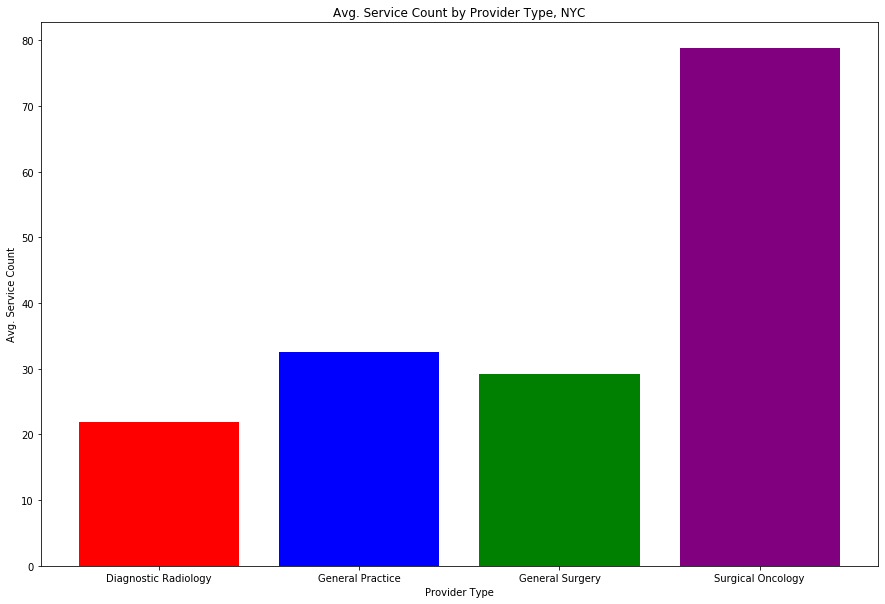

In [72]:
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(15,10))
plt.bar(phys_nyc_group['provider_type'], phys_nyc_group['bene_day_srvc_cnt'], color=colors)
plt.xlabel('Provider Type')
plt.ylabel('Avg. Service Count')
plt.title('Avg. Service Count by Provider Type, NYC')
plt.show()

In [47]:
hosp_nyc = hosp_nyc.drop(['Provider State', 'Provider Zip Code', 'APC', 'CBSA'], axis=1)
hosp_nyc = hosp_nyc.rename(columns={'Provider ID' : 'id/npi', 'Provider Name' : 'name', 'Comprehensive APC Services' : 'srvce_cnt', 'Average Medicare Allowed Amount' : 'med_allwd_amt', 'ZIP' : 'zip'})
print(hosp_nyc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 40334 to 43361
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id/npi         66 non-null     object 
 1   name           66 non-null     object 
 2   srvce_cnt      66 non-null     int64  
 3   med_allwd_amt  66 non-null     float64
 4   zip            66 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.1+ KB
None


In [48]:
phys_nyc = phys_nyc.drop(['nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'place_of_service', 'hcpcs_code', 'zip_5digits', 'CBSA', 'HCPCS Code', 'APC', 'Relative Weight', 'Payment Rate', 'Minimum Unadjusted Copayment'], axis=1)
phys_nyc = phys_nyc.rename(columns={'npi' : 'id/npi', 'nppes_provider_last_org_name' : 'name', 'bene_day_srvc_cnt' : 'srvce_cnt', 'average_Medicare_allowed_amt' : 'med_allwd_amt', 'ZIP' : 'zip'})
print(phys_nyc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 82733 to 10969659
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id/npi         162 non-null    object 
 1   name           162 non-null    object 
 2   srvce_cnt      162 non-null    float64
 3   med_allwd_amt  162 non-null    float64
 4   zip            162 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.6+ KB
None


In [49]:
print(np.mean(phys_nyc['srvce_cnt']))

24.512345679012345


In [50]:
print(np.mean(phys_nyc['med_allwd_amt']))

651.9827378059879


In [51]:
print(np.mean(hosp_nyc['med_allwd_amt']))

1442.3089807571441


In [52]:
print(np.mean(hosp_nyc['srvce_cnt']))

223.0


In [53]:
nyc_union = pd.concat([phys_nyc, hosp_nyc], ignore_index=True)
print(nyc_union)

         id/npi                                         name  srvce_cnt  \
0    1003887613                                     SALDANHA       13.0   
1    1013179894                                         SHAH       16.0   
2    1023040771                                       O'SHEA       36.0   
3    1023329299                                     KAMENETZ       46.0   
4    1033166582                                          LEE       20.0   
..          ...                                          ...        ...   
223      330393                          University Hospital      518.0   
224      330395  St John's Episcopal Hospital At South Shore       28.0   
225      330396    Woodhull Medical And Mental Health Center       18.0   
226      330399                         St Barnabas Hospital       32.0   
227      330401               St Catherine Of Siena Hospital       86.0   

     med_allwd_amt    zip  
0       816.599231  11530  
1       740.342500  10028  
2       766.120

Going to a physician/other supplier for a level 2 biopsy would possibly have less of a wait time, since their service count is significantly lower than for hospitals.

In [54]:
print(phys_nyc)

              id/npi      name  srvce_cnt  med_allwd_amt    zip
82733     1003887613  SALDANHA       13.0     816.599231  11530
142810    1013179894      SHAH       16.0     740.342500  10028
240913    1023040771    O'SHEA       36.0     766.120000  07042
314456    1023329299  KAMENETZ       46.0     810.058261  10461
360543    1033166582       LEE       20.0     753.693000  07042
...              ...       ...        ...            ...    ...
10577508  1962460758       FOU       20.0     818.960000  10580
10624299  1962608380        PO       18.0     795.360000  11757
10632757  1962662221  ABRAMSON       13.0     175.779231  10019
10636301  1962678474     ABBEY       11.0     759.207273  07601
10969659  1992908529  LADETSKY       15.0     193.020000  10029

[162 rows x 5 columns]


In [64]:
print(max(phys_nyc['srvce_cnt']))

159.0


In [59]:
print(hosp_nyc)

       id/npi                                           name  srvce_cnt  \
40334  330006                     St Joseph's Medical Center         19   
40346  330009                  Bronx-Lebanon Hospital Center         13   
40422  330014                Jamaica Hospital Medical Center         12   
40428  330019  New York Community Hospital Of Brooklyn, Inc.         31   
40479  330024                           Mount Sinai Hospital        991   
...       ...                                            ...        ...   
43261  330393                            University Hospital        518   
43343  330395    St John's Episcopal Hospital At South Shore         28   
43349  330396      Woodhull Medical And Mental Health Center         18   
43356  330399                           St Barnabas Hospital         32   
43361  330401                 St Catherine Of Siena Hospital         86   

       med_allwd_amt    zip  
40334    1472.730000  10701  
40346    1472.955385  10456  
40422    

In [67]:
print(hosp_nyc[hosp_nyc['srvce_cnt'] == max(hosp_nyc['srvce_cnt'])])

       id/npi                                              name  srvce_cnt  \
41618  330154  Memorial Hospital For Cancer And Allied Diseases       3881   

       med_allwd_amt    zip  
41618    1416.723012  10021  


In [70]:
phys_nyc_top5 = phys_nyc.sort_values(by='srvce_cnt', ascending=False).head()
print(phys_nyc_top5)

              id/npi        name  srvce_cnt  med_allwd_amt    zip
5770544   1528117207       LYGAS      159.0     756.100000  08724
8083385   1730254053  PELLEGRINO      140.0     756.100000  08724
6652061   1609846138     DORFMAN       76.0     805.968816  11757
10550382  1962403147      SULTAN       75.0     773.903067  07304
6490947   1598082570      BASSIS       64.0     812.561875  11757


In [71]:
hosp_nyc_top5 = hosp_nyc.sort_values(by='srvce_cnt', ascending=False).head()
print(hosp_nyc_top5)

       id/npi                                              name  srvce_cnt  \
41618  330154  Memorial Hospital For Cancer And Allied Diseases       3881   
40479  330024                              Mount Sinai Hospital        991   
42329  330214                             Nyu Langone Hospitals        985   
41219  330106                   North Shore University Hospital        833   
41119  330101                    New York-Presbyterian Hospital        791   

       med_allwd_amt    zip  
41618    1416.723012  10021  
40479    1424.495691  10029  
42329    1404.513391  10016  
41219    1416.318319  11030  
41119    1452.584286  10065  


In [74]:
nyc_union2 = pd.concat([phys_nyc_top5, hosp_nyc_top5], ignore_index=True)
print(nyc_union2)

       id/npi                                              name  srvce_cnt  \
0  1528117207                                             LYGAS      159.0   
1  1730254053                                        PELLEGRINO      140.0   
2  1609846138                                           DORFMAN       76.0   
3  1962403147                                            SULTAN       75.0   
4  1598082570                                            BASSIS       64.0   
5      330154  Memorial Hospital For Cancer And Allied Diseases     3881.0   
6      330024                              Mount Sinai Hospital      991.0   
7      330214                             Nyu Langone Hospitals      985.0   
8      330106                   North Shore University Hospital      833.0   
9      330101                    New York-Presbyterian Hospital      791.0   

   med_allwd_amt    zip  
0     756.100000  08724  
1     756.100000  08724  
2     805.968816  11757  
3     773.903067  07304  
4     812.5

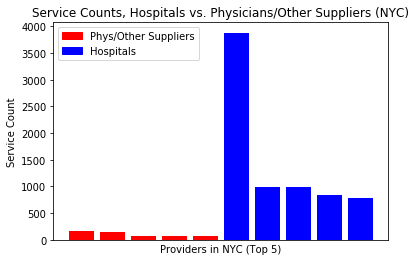

In [78]:
colors = []
for cnt in nyc_union2['srvce_cnt']:
    if cnt < 160:
        colors.append('red')
    else:
        colors.append('blue')
labels = {'Phys/Other Suppliers' : 'red', 'Hospitals' : 'blue'}
labels2 = list(labels.keys())
plt.bar(nyc_union2['id/npi'], nyc_union2['srvce_cnt'], color=colors, label=labels)
handles = [plt.Rectangle((0,0),1,1, color=labels[label]) for label in labels2]
plt.xticks([])
plt.xlabel('Providers in NYC (Top 5)')
plt.ylabel('Service Count')
plt.title('Service Counts, Hospitals vs. Physicians/Other Suppliers (NYC)')
plt.legend(handles, labels2)
plt.show()